In [ ]:
%%HTML
<style>
.container { width:100% }
</style>

# Fazit
Abschließend soll ein Fazit zum entwickelten Mühle-Spiel gezogen werden. Dazu wird die Performance der implementierten Algorithmen Alpha-Beta und Minimax verglichen und beurteilt. Des Weiteren soll analysiert werden, mit welchen Maßnahmen die Künstliche Intelligenz weiter verbessert werden könnte.

## Alpha-Beta vs. Minimax
Für die folgende Auswertung ist zu beachten, dass die Spiele auf einem Rechner mit folgender Spezifikation durchgeführt wurden:
* Prozessor: AMD Ryzen 5 3600x
* RAM: 16Gb DDR4

Zur Bewertung der zeitlichen Performance wurden Spiele durchgeführt, bei denen die beiden Algorithmen Alpha-Beta-Pruning und Minimax mit der gleichen Suchtiefe gegeneinander gespielt haben. Die Ergebnisse sind der unten aufgeführten Tabelle sowie den Grafiken zu entnehmen.

Suchtiefe | Ø Zugzeit Alpha-Beta (s) | Ø Zugzeit Minimax (s) | MM/AB
:--:|--|--|--
2 | 0,551338714  | 0,692698593 | 126%
3 | 0,37587081 | 0,494166458 | 131%
4 | 0,504812208  | 0,801580364 | 159%
5 | 2,36854893 | 6,745960603 | 285%
6 | 18,09719203  | 79,44205967 | 439%

<img src="images\linear.png" alt="Durchschnittliche Zugzeit, lineare Achse" width="300"/>
<img src="images\logarithmic.png" alt="Durchschnittliche Zugzeit, logarithmische Achse" width="300"/>

Zu sehen ist, dass sowohl der absolute als auch der relative Abstand mit zunehmender Suchtiefe exponentiell steigen. Das heißt, dass gerade bei einer großen Suchtiefe Alpha-Beta-Pruning wesentlich schneller ist. Doch eine höhere Suchtiefe führt zu einem besseren Spiel der künstlichen Intelligenz und somit zu einer höheren Gewinnwahrscheinlichkeit. Deshalb ist für diesen Anwendungsfall als Such-Algorithmus Alpha-Beta-Pruning die bessere Wahl.




In [3]:
def restart_start(): 
    gamemode_toggle.disabled = False
    gamemode_toggle.value = 'Spieler vs Spieler'
    global game
    game = Game()
    clear_output(wait = True)
    game.update_canvas()

<AxesSubplot:>

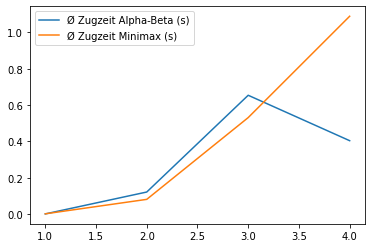

In [4]:
import random 
import pandas as pd
%run ./Muehle_GUI.ipynb

ab_avg = []
mm_avg = []

#lot from depth=1 to depth=4
for x in range(1,4+1):
    global game
    game = Game()
    clear_output(wait = True)
    ab_depth    = x
    mm_depth    = x
    gamemode_toggle.value = 'alpha-beta vs Minimax'
    game.pause = False
    game.update_canvas()
    game.algo_step()

    ab_avg += [ab_time/ab_moves]
    mm_avg += [mm_time/mm_moves]

    ab_time = 0
    ab_moves = 0
    mm_time = 0
    mm_moves = 0

    restart_start()

clear_output(wait = True)
#Plotting
df = pd.DataFrame(data={'Ø Zugzeit Alpha-Beta (s)':ab_avg, 'Ø Zugzeit Minimax (s)':mm_avg})
df.index = df.index+1

df.plot(y=["Ø Zugzeit Alpha-Beta (s)", "Ø Zugzeit Minimax (s)"], kind="line")



<AxesSubplot:>

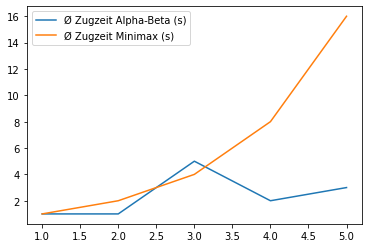

,Ø Zugzeit Alpha-Beta (s),Ø Zugzeit Minimax (s)
1,1,1
2,2,2


## Ausblick

Das entwickelte Mühle-Spiel ist in der Lage, verschiedene Spielmodi anzubieten. Das Spielen gegen eine KI, sowie das Spiel KI gegen KI ist möglich, sodass das grundlegende Ziel dieser Arbeit erfüllt wurde. Auch die Verwendung von Transpositionstabellen als Speicher für die bereits bewerteten Zustände wurde umgesetzt. Eine Bewertung der Ergebnisse wurde im vorangehenden Kapitel vorgenommen. Nun soll auf Möglichkeiten eingegangen werden, die die Performance optimieren oder die Stärke der KI steigern.

Die erste Möglichkeit hier ist die Verbesserung der Heuristik. Da die Heuristik die Bewertung der Zustände vornimmt und somit über den nächsten Zustand entscheidet, ist sie der Ansatzpunkt für Leistungssteigerungen. Aktuell umfasst die Heuristik die Aspekte Anzahl der Spielsteine sowie die Anzahl der geschlossenen Mühlen.  Überlegungen für weitere Aspekte sind die Betrachtung der Anzahl der Zugmöglichkeiten und Anzahl der offenen Mühlen sowie die Bewertung von bestimmten Stellungen. Kriterien für die Entscheidung sind die Veränderung der Rechenzeit und des Gewinnanteils. Ist Erhöhung der Rechenzeit möglichst niedrig, während der Anteil der Gewinne gesteigert werden kann, sollte der Aspekt in die Heuristik mit aufgenommen werden. Auch die Gewichtung der unterschiedlichen Aspekte ist ein Punkt, an dem noch eingegriffen und optimiert werden kann.

Eine weitere Verbesserungsmöglichkeit ist die Einführung einer Spieldatenbank zur Ermittlung besserer Züge. Prinzipiell ist so eine Datenbank für das gesamte Spiel nutzbar, aufgrund des hohen Speicherbedarfs wird häufig jedoch nur eine Endspieldatenbank umgesetzt. Gerade in der dritten Spielphase, wenn die Spieler viele Zugmöglichkeiten haben und der Spielbaum so stark verzweigt ist, kann dies hilfreich sein. Ein Grundstein für die Erstellung und Verwendung einer solchen Spieldatenbank wurde mit dem Abspeichern der Spiele schon gelegt. Eine richtige Verwendung der Datenbank lag jedoch nicht im Anforderungsrahmen dieser Studienarbeit. 

Eine weitere Optimierungsmöglichkeit, um schneller mehr Zustände abzudecken und den Speicherbedarf zu senken ist die Beachtung von Symmetrien und Drehungen. Die Grafik unten veranschaulicht die Symmetrien eines Spielfeldes. Die roten Achsen sind einfache Spiegelungen. Aber auch das Tauschen des inneren und äußeren Rings ist möglich. Dies wird durch die grünen Linien veranschaulicht.

<img src="images\symmetries.png" alt="Symmetrien eines Spielbrettes" width="300"/>

Auch eine Drehung des Spielfelds um 90, 180 oder 270 Grad verändert den eigentlichen Zustand nicht, weshalb auch hier eine Vereinfachung stattfinden kann.

Bei der Überlegung, ob Symmetrien und Drehungen betrachtet werden sollen, ist zu beachten, dass zwar der Speicheraufwand und die Anzahl der möglichen Zustände reduziert werden, die Rechenzeit jedoch stark zunimmt.

Abschließend ist zu sagen, dass noch weitere Verbesserungen möglich sind, dies aber immer unter Abwägung der Vor- und Nachteile und vor allem hinsichtlich der benötigten Rechenzeit geschehen sollte.